In [9]:
import numpy as np

In [90]:
class LinearReg():
    def __init__(self,X,intercept=True):
        self.p = X.shape[1]
        self.n = X.shape[0]
        self.intercept = intercept
        
    def design_matrix(self,X,y):
        if self.intercept:
            ones = np.ones((X.shape[0],1))
            X = np.hstack([ones, X])
        y = y.reshape((-1,1))
        return X,y
    
    def fit(self, X, y):
        X, y = self.design_matrix(X,y)
        self.beta_hat = np.linalg.inv(X.T@X)@X.T@y
        self.H = X@np.linalg.inv(X.T@X)@X.T
        self.y_hat = self.H@y
        self.E_hat = y - self.H@y
        self.se_square = np.sum((y - self.E_hat)**2)/(self.n-self.p)
        
    def residuals(self,y):
        self.Stand_Res = self.E_hat/(np.sqrt(self.se_square*(1-np.diag(self.H)))).reshape(len(y),-1)
        self.Student_Res = self.Stand_Res*np.power((self.n-self.p-self.Stand_Res**2)/(self.n-self.p-1),-0.5)
#         print("Standardized residual", self.Stand_Res)
#         print("Studentized Residuals", self.Student_Res)
        

In [91]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

In [92]:
Lg = LinearReg(x)

In [93]:
Lg.fit(x,y)
Lg.residuals(y)

In [94]:
import matplotlib.pyplot as plt

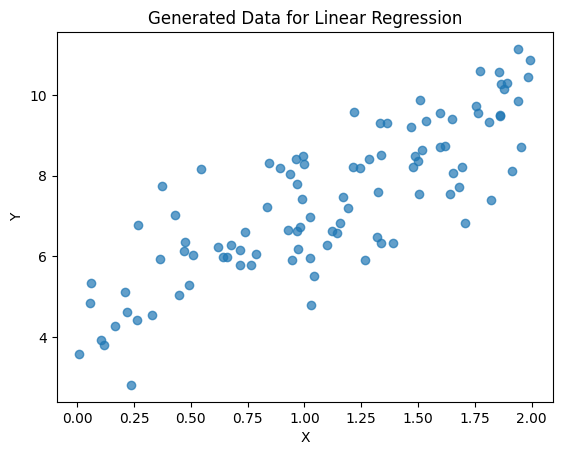

In [95]:
plt.scatter(x,y,alpha = 0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Data for Linear Regression')
plt.show()

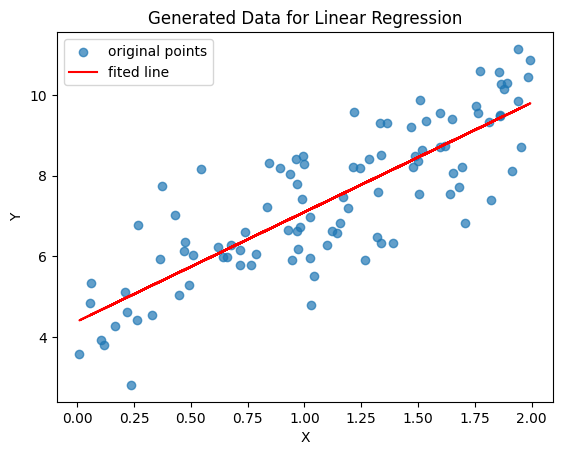

In [96]:
plt.scatter(x,y,alpha = 0.7,label="original points")
plt.plot(x,Lg.y_hat,c="red",label="fited line")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Data for Linear Regression')
plt.legend()
plt.show()

In [97]:
x.shape,Lg.Stand_Res.shape,Lg.E_hat.shape

((100, 1), (100, 1), (100, 1))

In [98]:
Lg.E_hat/np.sqrt(Lg.se_square*(1-np.diag(Lg.H)))
(Lg.se_square*(1-np.diag(Lg.H))).shape,Lg.E_hat.shape

((100,), (100, 1))

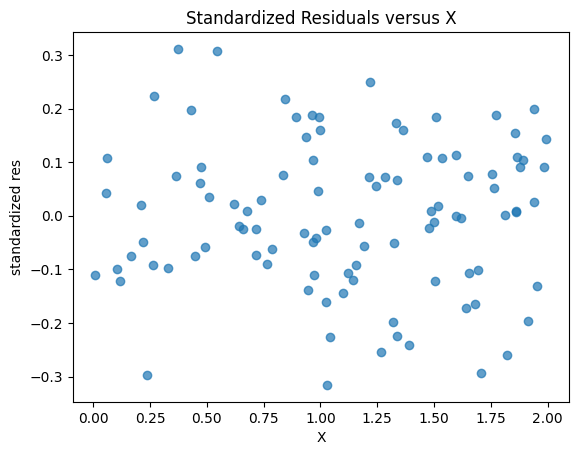

In [103]:
plt.scatter(x,Lg.Stand_Res,alpha = 0.7)
plt.xlabel('X')
plt.ylabel('standardized res')
plt.title('Standardized Residuals versus X')
plt.show()

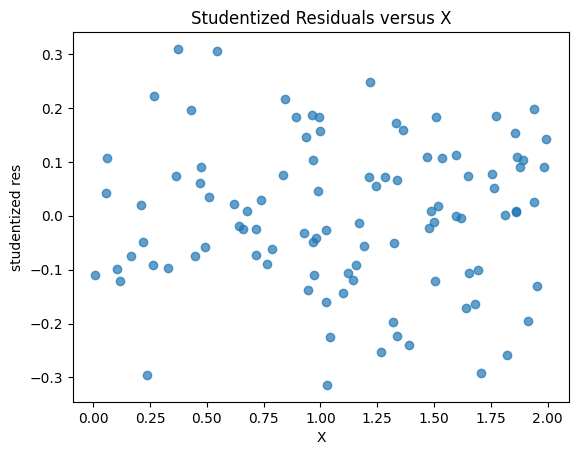

In [102]:
plt.scatter(x,Lg.Student_Res,alpha = 0.7)
plt.xlabel('X')
plt.ylabel('studentized res')
plt.title('Studentized Residuals versus X')
plt.show()